# CASE STUDY: Fashion Class Classifier

# Mfonobong Isine

# Problem Statement

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Visualization of The Dataset

In [4]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [12]:
fashion_train_df.shape

(60000, 785)

In [13]:
fashion_test_df.shape

(10000, 785)

In [14]:
training = np.array(fashion_train_df, dtype = 'float32')

In [15]:
testing = np.array(fashion_test_df, dtype = 'float32')

1.0


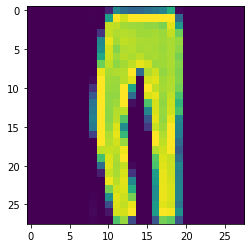

In [16]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
print(label)

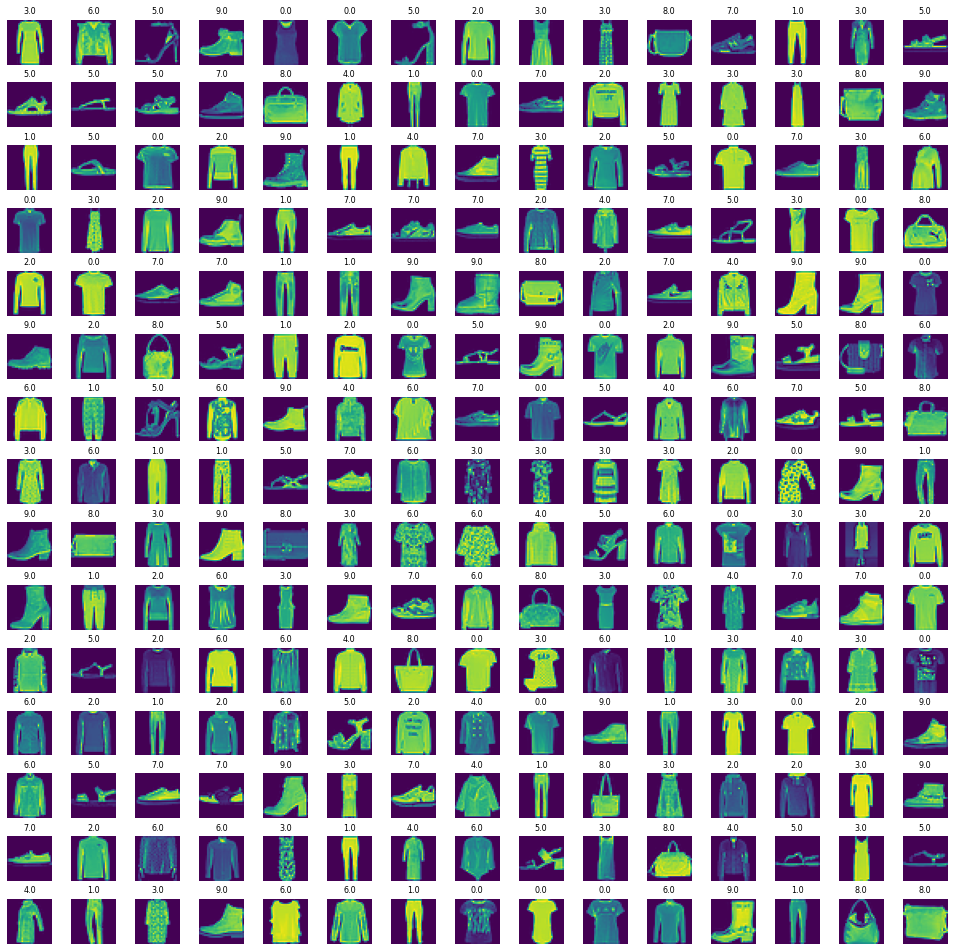

In [17]:
#lets view the images in a grid format
#define the dimensions of the plot grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17, 17))
axes = axes.ravel() #flattens the 15 x 15 matrix into 225 array
n_training = len(training) #get the length of the training dataset

#select a random number from 0 to n_training
for i in np.arange(0, w_grid * l_grid): #create evenly spaced variables
    #select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Model Training 

In [18]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [19]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [22]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))


In [23]:
x_train.shape

(48000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
x_validate.shape

(12000, 28, 28, 1)

In [26]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()

In [29]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [30]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [31]:
cnn_model.add(Flatten())

In [32]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [33]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [34]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [35]:
epochs = 50

In [36]:
cnn_model.fit(x_train,
             y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data = (x_validate, y_validate))

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 496us/step - loss: 0.9939 - accuracy: 0.6591 - val_loss: 0.5701 - val_accuracy: 0.7957
Epoch 2/50
48000/48000 [==============================] - 22s 468us/step - loss: 0.4962 - accuracy: 0.8274 - val_loss: 0.4445 - val_accuracy: 0.8462
Epoch 3/50
48000/48000 [==============================] - 22s 455us/step - loss: 0.4307 - accuracy: 0.8504 - val_loss: 0.4236 - val_accuracy: 0.8511
Epoch 4/50
48000/48000 [==============================] - 22s 453us/step - loss: 0.4005 - accuracy: 0.8605 - val_loss: 0.3835 - val_accuracy: 0.8681
Epoch 5/50
48000/48000 [==============================] - 22s 449us/step - loss: 0.3708 - accuracy: 0.8709 - val_loss: 0.3772 - val_accuracy: 0.8656
Epoch 6/50
48000/48000 [==============================] - 22s 455us/step - loss: 0.3513 - accuracy: 0.8779 - val_loss: 0.3747 - val_accuracy: 0.8690
Epoch 7/50
48000/48000 [==============================] 

In [37]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('test accuracy : {: .3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 200us/step
test accuracy :  0.911


In [38]:
predicted_classes = cnn_model.predict_classes(x_test)

In [39]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

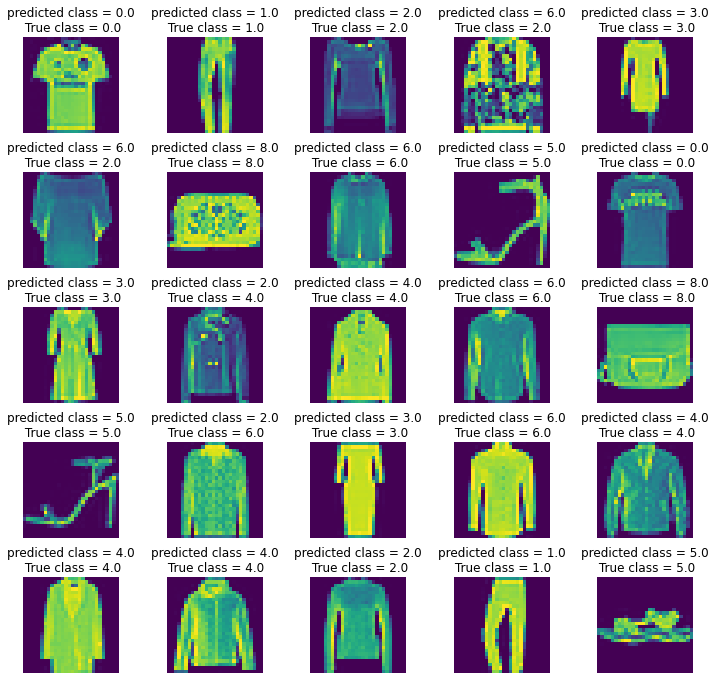

In [40]:
#lets view the images in a grid format
#define the dimensions of the plot grid
w_grid = 5
l_grid = 5

fig, axes = plt.subplots(l_grid, w_grid, figsize = (12, 12))
axes = axes.ravel() #flattens the 15 x 15 matrix into 225 array



for i in np.arange(0, w_grid * l_grid): 
    
    
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title('predicted class = {:0.1f}\n True class = {:0.1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [41]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

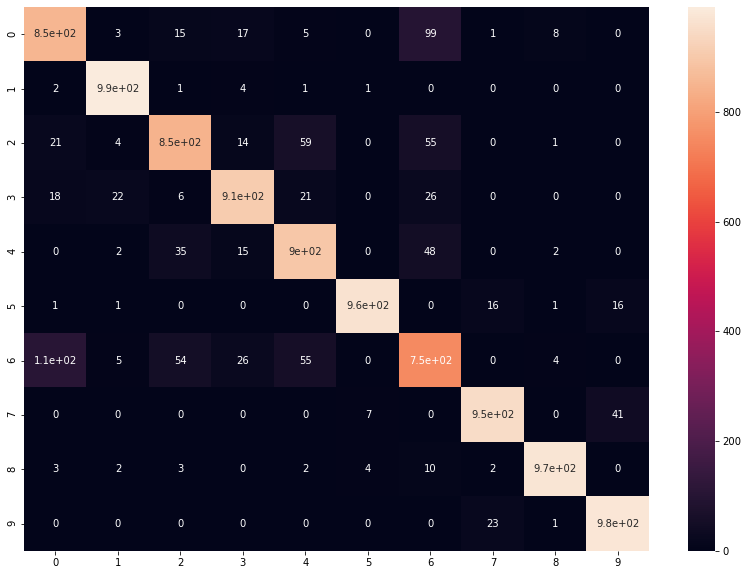

In [42]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [43]:
from sklearn.metrics import classification_report

In [44]:
num_classes = 10
target_name = ['class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_name))

              precision    recall  f1-score   support

     class 0       0.85      0.85      0.85      1000
     class 1       0.96      0.99      0.98      1000
     class 2       0.88      0.85      0.86      1000
     class 3       0.92      0.91      0.91      1000
     class 4       0.86      0.90      0.88      1000
     class 5       0.99      0.96      0.98      1000
     class 6       0.76      0.75      0.75      1000
     class 7       0.96      0.95      0.95      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [45]:
#saving our model
cnn_model.save('C:/Users/hp/fashion_classifier_model')
print('model saved')

model saved
